# **Library Phyton**

In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns


# **Load Dataset**

In [6]:
# Load dataset Iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Tambahkan label spesies
df['species'] = iris.target

# Pisahkan fitur (X) dan target (y)
X = df.drop(columns=['species'])
y = df['species']
df.head(10)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


# **EDA**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [9]:
df['species'].unique()

array([0, 1, 2])

In [10]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


# **Split Data**

In [13]:
# Split data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Modelling**

In [14]:
# Buat model Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Latih model dengan data training
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

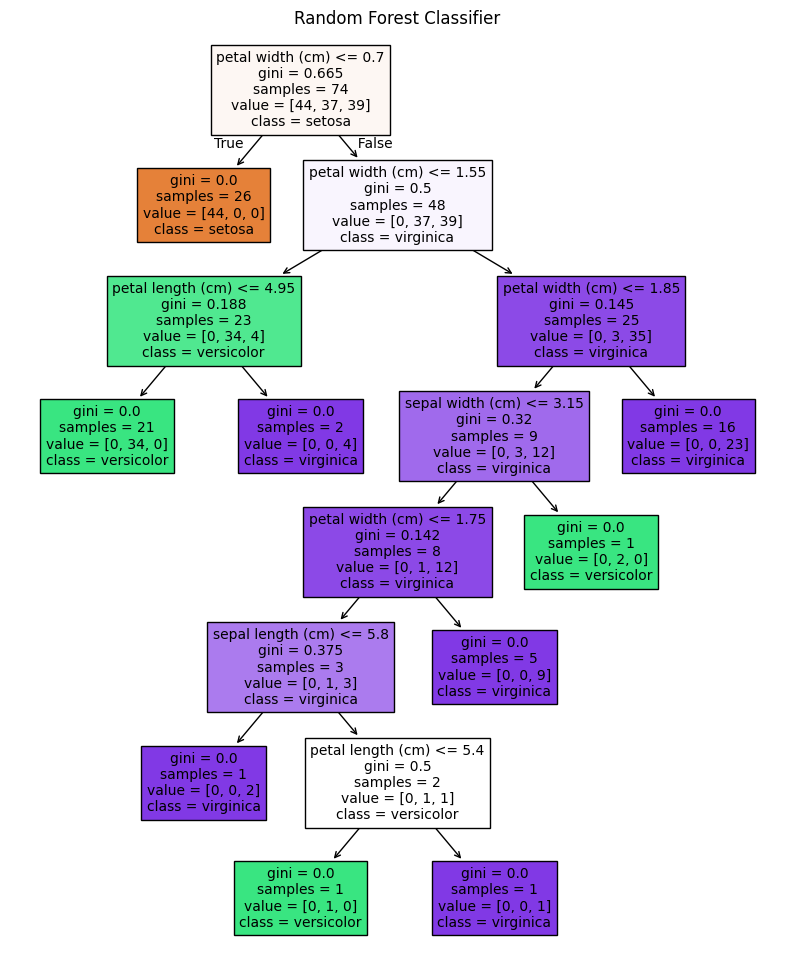

In [23]:
plt.figure(figsize=(10,12))
tree.plot_tree(model.estimators_[0], feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title("Random Forest Classifier")
plt.show()

# **Confusion Matrix**

In [15]:
# Prediksi data uji
y_pred = model.predict(X_test)

# Hitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi Model: {accuracy:.2f}')

# Lihat laporan klasifikasi
print(classification_report(y_test, y_pred))


Akurasi Model: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



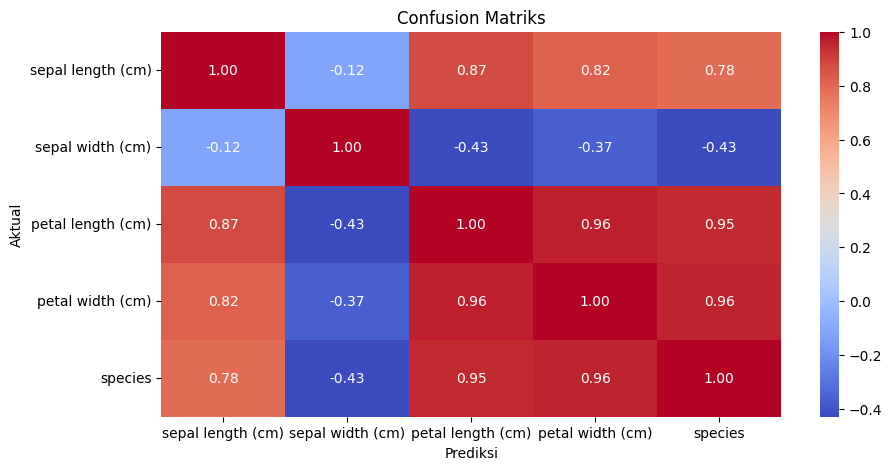

In [43]:
# Opsional: Visualisasi matriks kebingungan
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Confusion Matriks")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()

In [35]:
# Data bunga baru
new_sample = np.array([[5.4,3.4, 1.7, 0.2 ]])

new_sample[0:1]


array([[5.4, 3.4, 1.7, 0.2]])

In [36]:
# Prediksi spesiesnya
predicted_species = model.predict(new_sample)
species_name = iris.target_names[predicted_species[0]]
print(f'Spesies Prediksi: {species_name}')

Spesies Prediksi: setosa


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
